<a href="https://colab.research.google.com/github/brianfarrelly/final_capstone/blob/master/viral_pneumonia_xrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

from google.colab import drive


import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
DATASET_DIR = "/content/gdrive/My Drive/data/coronadata/normal_viral/"

In [4]:
os.listdir(DATASET_DIR)


['test', 'train']

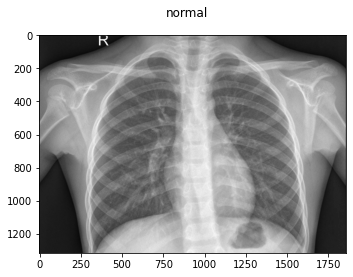

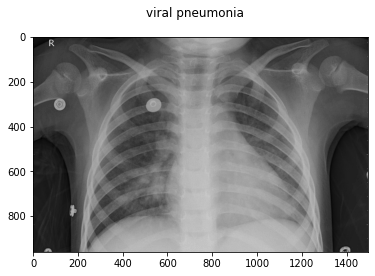

In [6]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/test/normal/*'):
    normal_images.append(mpimg.imread(img_path))
    break

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/test/viral/*'):
    covid_images.append(mpimg.imread(img_path))
    break

fig = plt.figure()
fig.suptitle('viral pneumonia')
plt.imshow(covid_images[0], cmap='gray') 

In [0]:
IMG_W = 400
IMG_H = 400
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))

model.add(Dense(2))

#model.add(Dense(1))
#model.add(Activation("sigmoid"))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 398, 398, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 197, 197, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 197, 197, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)       

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['mae', 'sparse_categorical_accuracy'])


In [11]:
print(DATASET_DIR)

/content/gdrive/My Drive/data/coronadata/normal_viral/


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

valid_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)


In [13]:
train_generator = train_datagen.flow_from_directory(
    #directory=r"/content/gdrive/My Drive/data/corona_normal_bacterial/train/",
    directory=DATASET_DIR + "/train/",
    target_size=(IMG_W, IMG_H),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    #directory=r"/content/gdrive/My Drive/data/corona_normal_bacterial/train/",
    directory=DATASET_DIR + "/train/",
    target_size=(IMG_W, IMG_H),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    #directory=r"/content/gdrive/My Drive/data/corona_normal_bacterial/test/",
    directory=DATASET_DIR + "/test/",
    target_size=(IMG_W, IMG_H),
    color_mode="rgb",
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=42
)


Found 2600 images belonging to 2 classes.
Found 780 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 64,
    validation_data = validation_generator, 
    validation_steps = 16,
    epochs = 50)

Epoch 1/50
13/64 [=====>........................] - ETA: 15:22 - loss: 0.7243 - mae: 0.5831 - sparse_categorical_accuracy: 0.5120

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/64 [===========>..................] - ETA: 11:25 - loss: 0.7071 - mae: 0.5510 - sparse_categorical_accuracy: 0.5180

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


64/64 [==============================] - 1111s 17s/step - loss: 0.6868 - mae: 0.5932 - sparse_categorical_accuracy: 0.5721 - val_loss: 0.7156 - val_mae: 0.7127 - val_sparse_categorical_accuracy: 0.6523
Epoch 2/50
64/64 [==============================] - 293s 5s/step - loss: 0.6035 - mae: 0.8060 - sparse_categorical_accuracy: 0.7075 - val_loss: 0.3855 - val_mae: 1.0886 - val_sparse_categorical_accuracy: 0.8049
Epoch 3/50
64/64 [==============================] - 84s 1s/step - loss: 0.4027 - mae: 1.4038 - sparse_categorical_accuracy: 0.8320 - val_loss: 0.1869 - val_mae: 1.7016 - val_sparse_categorical_accuracy: 0.8613
Epoch 4/50
64/64 [==============================] - 97s 2s/step - loss: 0.3233 - mae: 1.8388 - sparse_categorical_accuracy: 0.8725 - val_loss: 0.2376 - val_mae: 2.0698 - val_sparse_categorical_accuracy: 0.9248
Epoch 5/50
64/64 [==============================] - 77s 1s/step - loss: 0.3040 - mae: 2.0226 - sparse_categorical_accuracy: 0.8785 - val_loss: 0.6641 - val_mae: 1.8508

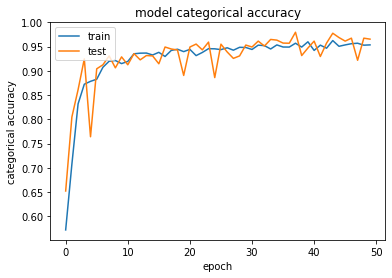

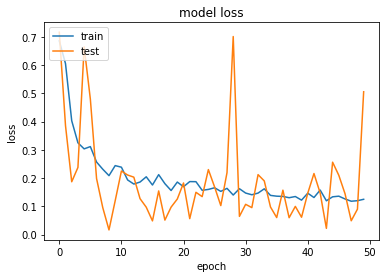

In [15]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 
 
 
Classification Report
              precision    recall  f1-score   support

      Normal       0.97      0.70      0.82       200
       Viral       0.77      0.97      0.86       200

    accuracy                           0.84       400
   macro avg       0.87      0.84      0.84       400
weighted avg       0.87      0.84      0.84       400

 
 
 


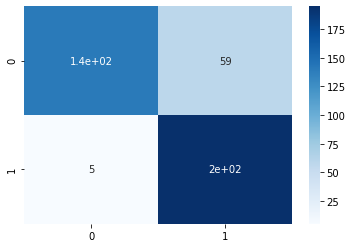

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

#print(y_pred)

#print('Confusion Matrix')
#print(confusion_matrix(test_generator.classes, y_pred))

print(" ")
print(" ")
print(" ")


print('Classification Report')
target_names = ['Normal', 'Viral']

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

print(" ")
print(" ")
print(" ")

#print(test_generator.classes)

cm = confusion_matrix(test_generator.classes, y_pred)

sns.heatmap(cm, cmap='Blues', annot=True)


In [18]:
print(DATASET_DIR)

/content/gdrive/My Drive/data/coronadata/normal_viral/


In [19]:
# evaluate the model
scores = model.evaluate(test_generator, verbose=1)


13/13 [==============================] - 15s 1s/step


In [20]:
print(model.metrics_names)

['loss', 'mae', 'sparse_categorical_accuracy']


In [21]:
print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f" % (model.metrics_names[1], scores[1]))
print("%s: %.2f" % (model.metrics_names[2], scores[2]))

loss: 0.08
mae: 2.28
sparse_categorical_accuracy: 0.84


In [22]:
# save model and architecture to single file
model.save(DATASET_DIR+ "/viralmodel.h5")
print("Saved model to disk")

Saved model to disk
